In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
!pip install pandas_profiling
import pandas_profiling as pp

# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [85]:
df=pd.read_csv("50_Startups.csv")

In [86]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## EDA

In [88]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [89]:
##Count of duplicated rows
df[df.duplicated()].shape

(0, 5)

### Renaming the columns

In [90]:
df=df.rename({'R&D Spend':'RnD_Spend' ,'Marketing Spend':'Marketing_spend' },axis=1)

In [91]:
df.head()

,RnD_Spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Drop Column

In [92]:
df=df.drop('State',axis=1)

In [93]:
df.head()

,RnD_Spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### correlation Matrix

In [94]:
df.corr()

,RnD_Spend,Administration,Marketing_spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### plots

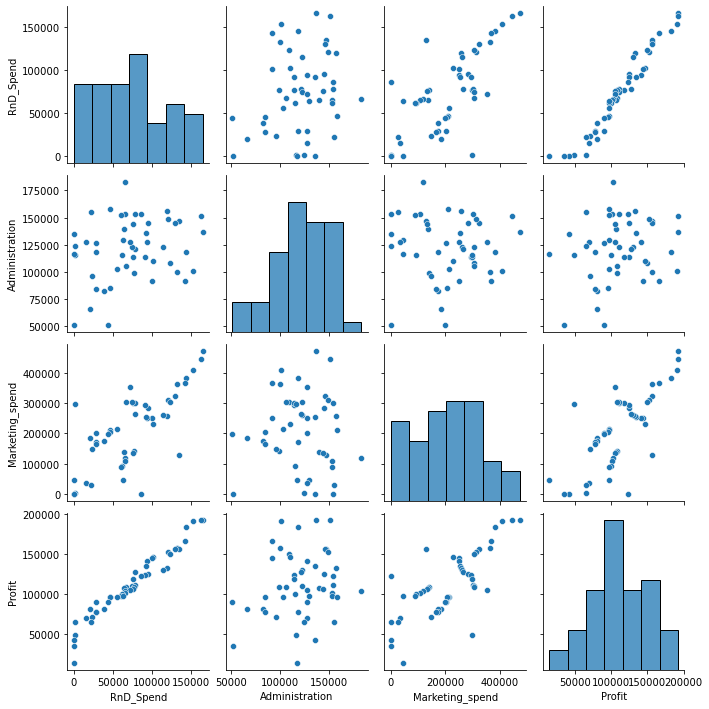

In [95]:
sns.pairplot(df)

In [96]:
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Preparing a model

### Model 1

In [97]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ RnD_Spend+Administration+Marketing_spend', data=df).fit()

In [98]:
#Coefficients
model.params

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_spend        0.027228
dtype: float64

In [99]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RnD_Spend          17.846374
Administration     -0.525507
Marketing_spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RnD_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_spend    1.047168e-01
dtype: float64


In [100]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           4.53e-30
Time:                        15:09:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2

In [102]:
model2 = smf.ols('np.log(Profit) ~ RnD_Spend+Administration+Marketing_spend', data=df).fit()

In [103]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.7617193422399914, 0.7461792993425995)

### Model 3

In [104]:
model3 = smf.ols('Profit ~ np.log(RnD_Spend+Administration+Marketing_spend)', data=df).fit()

In [105]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6689676136555539, 0.6620711056067112)

### Model 4

In [106]:
model4 = smf.ols('Profit ~ np.sqrt(RnD_Spend+Administration+Marketing_spend)', data=df).fit()

In [107]:
#R squared values
(model4.rsquared,model4.rsquared_adj)

(0.7396453820962448, 0.7342213275565832)

## Simple Linear Regression Models

In [108]:
# Build SLR and MLR models for insignificant variables 'Administration' and 'Marketing_spend'
# Also find their tvalues and pvalues

In [109]:
ml_v=smf.ols('Profit~RnD_Spend',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  
ml_v.summary()

Intercept    19.320288
RnD_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD_Spend    3.500322e-32
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           3.50e-32
Time:                        15:10:22   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD_Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
ml_v=smf.ols('Profit~Administration',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  
ml_v.summary()

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 03 Sep 2021   Prob (F-statistic):              0.162
Time:                        15:10:23   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# Administration has insignificant p-value

In [112]:
ml_v=smf.ols('Profit~Marketing_spend',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  
ml_v.summary()

Intercept          7.808356
Marketing_spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_spend    4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           4.38e-10
Time:                        15:10:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# Marketing Spend has significant p-value.

In [114]:
ml_v=smf.ols('Profit~Administration+Marketing_spend',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  
ml_v.summary()

Intercept          1.142741
Administration     2.467779
Marketing_spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_spend    9.727245e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           2.50e-10
Time:                        15:10:32   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# variables have significant p-value.

## Model Validation

### Calculating VIF

In [117]:
rsq_RnD= smf.ols('RnD_Spend~Marketing_spend+Administration',data=df).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD)


rsq_Admin= smf.ols('Administration~Marketing_spend+RnD_Spend',data=df).fit().rsquared  
vif_Admin= 1/(1-rsq_Admin)

rsq_MS= smf.ols('Marketing_spend~Administration+RnD_Spend',data=df).fit().rsquared  
vif_MS= 1/(1-rsq_MS)

# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend','Administration','Marketing_spend'],'VIF':[vif_RnD,vif_Admin,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_spend,2.326773


In [118]:
# since none of the features have VIF greater than 10,we can retain all features

###  Residual Analysis

#### Test for Normality of Residuals(Q-Q Plot)

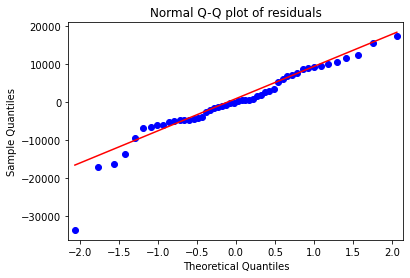

In [119]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [120]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

### Residual plot for homoscedasticity

In [121]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

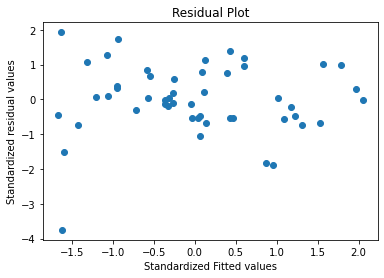

In [122]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [123]:
#so the errors are randomly distributed.

## Residual vs Regressors

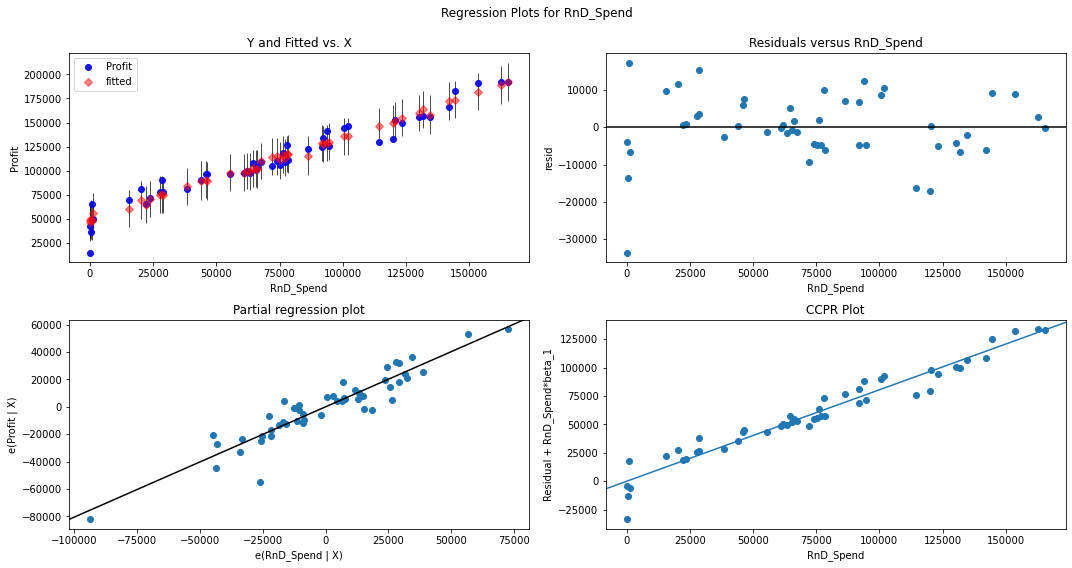

In [124]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RnD_Spend' ,fig=fig)
plt.show()

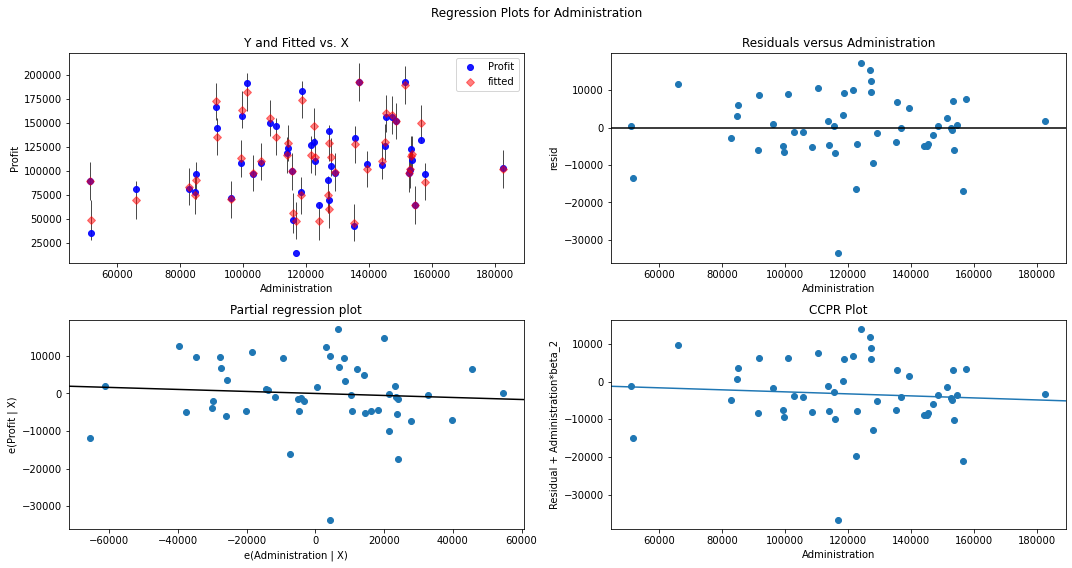

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration" , fig=fig)
plt.show()

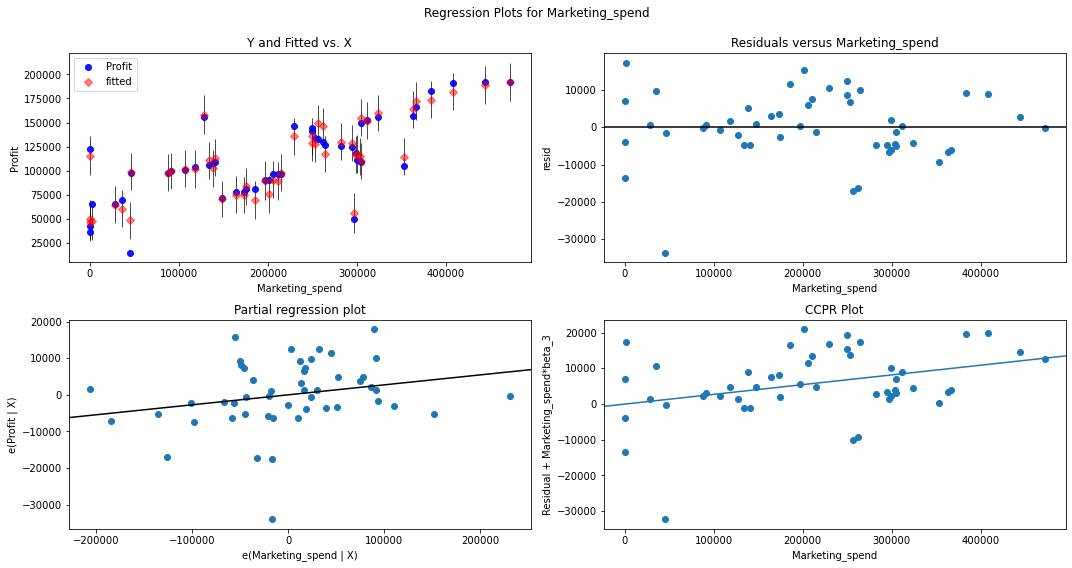

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_spend" , fig=fig)
plt.show()

In [127]:
# feature Administration has very little contribution

## Model Deletion Diagnostics

### Detecting influencers/outliers

In [129]:
#cook's Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

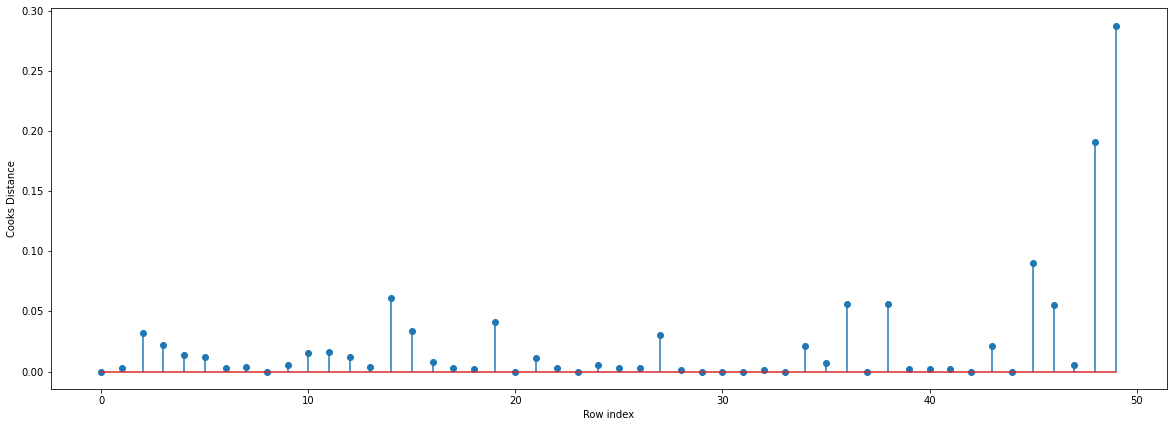

In [130]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [131]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [72]:
# since none of the points have more than cook's distance=.5, we can retain all the points.

### High influence points

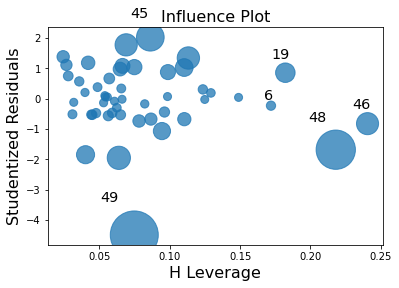

In [132]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [133]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [135]:
print(leverage_cutoff)

0.30000000000000004


## Improving the Model

In [136]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df

,RnD_Spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Final Model

In [148]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RnD_Spend+Administration+Marketing_spend",data=df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RnD_Spend+Administration+Marketing_spend",data=df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [149]:
(final_model.rsquared,final_model.aic,final_model.rsquared_adj)

(0.9613162435129847, 1020.5652974526367, 0.9587373264138503)

## Model Predictions

In [152]:
# say New data for prediction is
new_data=pd.DataFrame({'RnD_Spend':60000,"Administration":70000,"Marketing_spend":120000},index=[0])
new_data

,RnD_Spend,Administration,Marketing_spend
0,60000,70000,120000


In [153]:
# Manual Prediction of Price
final_model.predict(new_data)

0    100836.490866
dtype: float64

In [155]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## Table containing R^2 value for each prepared model

In [156]:
d2={'Prep_Models':['Model','Model2','Model3','Model4','Final_Model'],'Rsquared':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model2,0.761719
2,Model3,0.668968
3,Model4,0.739645
4,Final_Model,0.961316
